In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
# Hyper-parameter
batch_size = 100

# Load the MNIST dataset with torchvision 
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [3]:
# Define Neural Network model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet,self).__init__()
        self.fc1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size,num_classes)
        
    def forward(self,x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [4]:
# Instanciate the model
input_size = 784
hidden_size = 500
num_classes = 10

model = NeuralNet(input_size,hidden_size,num_classes)

print("Model description:\n", model)

Model description:
 NeuralNet(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


In [5]:
# Hyper-parameters
alpha = 0.001

# Construct loss function and optimizer
criterion = nn.CrossEntropyLoss()                           # Cross Entropy Loss
optimizer = torch.optim.SGD(model.parameters(), lr = alpha) # Stochastic Gradient Descent

Epoch: 0 loss: 2.1637370586395264
Epoch: 1 loss: 2.0279428958892822
Epoch: 2 loss: 1.8499441146850586
Epoch: 3 loss: 1.6165976524353027
Epoch: 4 loss: 1.4282584190368652
Epoch: 5 loss: 1.0912251472473145
Epoch: 6 loss: 1.0853626728057861
Epoch: 7 loss: 0.9299662113189697
Epoch: 8 loss: 0.8966645002365112
Epoch: 9 loss: 0.8915073275566101
Epoch: 10 loss: 0.813850998878479
Epoch: 11 loss: 0.7767559289932251
Epoch: 12 loss: 0.5921851992607117
Epoch: 13 loss: 0.7603703141212463
Epoch: 14 loss: 0.4669589102268219


Text(0.5,0,'epoch')

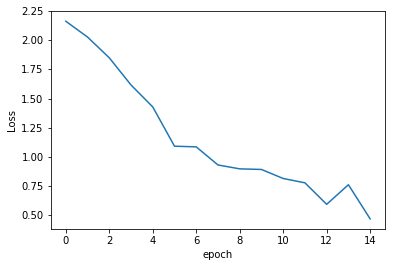

In [7]:
# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model.forward(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 86.71 %
